In [1]:
# If f3dasm is not found, install the correct version from pip
try:
    import f3dasm
except ModuleNotFoundError:
    %pip install f3dasm==0.2.91 --quiet
    import f3dasm

2022-12-07 16:49:41.016386: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-07 16:49:41.156607: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-07 16:49:41.804216: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.1/lib64
2022-12-07 16:49:41.804278: W tensorflow/compiler/xla/stream

In [2]:
# Check if you got the right version, otherwise uninstall this version!

import os

if f3dasm.__version__ != '0.2.91':
    %pip uninstall -y f3dasm
    os._exit(00)
    # The kernel will be restarted and you need to run the notebook again!
    
f3dasm.show_versions()


F3DASM:
       f3dasm: 0.2.91

System:
    python: 3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:21)  [GCC 9.4.0]
executable: /home/martin/miniconda3/envs/f3dasm_env2/bin/python
   machine: Linux-5.14.0-1054-oem-x86_64-with-debian-bullseye-sid

Python dependencies:
        numpy: 1.21.6
        scipy: 1.7.3
       pandas: 1.3.5
   matplotlib: 3.5.3
        SALib: 1.4.5
   hypothesis: 6.58.0
       GPyOpt: 1.2.6
          GPy: 1.10.0
     autograd: No __version__ attribute!
 numdifftools: 0.9.41
   tensorflow: 2.11.0
       pathos: 0.3.0
       pytest: 7.2.0
        pygmo: 2.16.1


Import third-party libraries:

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt

Define the seed of the random number generator:

In [4]:
seed = 54

Define the design space with `make_nd_continuous_design()`:

In [5]:
dimensionality = 1
design = f3dasm.make_nd_continuous_design(bounds=np.tile([0.,1.], (dimensionality, 1)),dimensionality=dimensionality)

Create a sampler:

In [6]:
N = 100 # Number of samples

sampler = f3dasm.sampling.LatinHypercube(design=design, seed=seed)
samples = sampler.get_samples(numsamples=N)
samples.show()

       input output
          x0      y
0   0.374406    NaN
1   0.321956    NaN
2   0.751770    NaN
3   0.766050    NaN
4   0.957157    NaN
..       ...    ...
95  0.576307    NaN
96  0.159263    NaN
97  0.254735    NaN
98  0.933930    NaN
99  0.456217    NaN

[100 rows x 2 columns]


Create an analytical benchmark function and evaluate the samples:

In [7]:
f = f3dasm.functions.Levy(dimensionality=dimensionality, seed=seed)
samples.add_output(f(samples.get_input_data().to_numpy()))

Create regressor from the `scikit-learn` library and fit it with the `samples`:

In [8]:
reg = GaussianProcessRegressor()


`fit()` the regressor. The regressor requires the `X` and `y` values as `numpy`-arrays

In [9]:
reg.fit(*samples.to_numpy())

GaussianProcessRegressor()

In [10]:
X_pred = np.linspace(0.,1.,100).reshape(-1,1)
y_pred = reg.predict(X_pred)

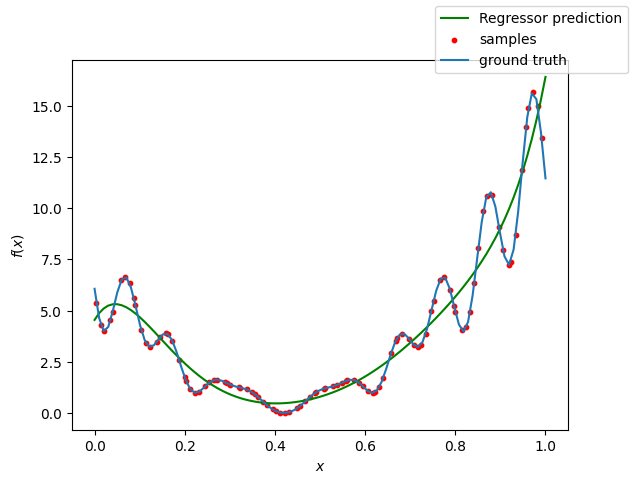

In [15]:
fig, ax = plt.figure(), plt.axes()

ax.plot(X_pred, y_pred, label='Regressor prediction', c='green')
ax.scatter(*samples.to_numpy(), label='samples', color='red', s=10)
ax.plot(np.linspace(0.,1.,100).reshape(-1,1), f(np.linspace(0.,1.,100).reshape(-1,1)), label='ground truth')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
fig.legend()